In [1]:
import re
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import altair as alt
import plotly.express as px
import xlrd
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import datetime
np.random.seed(42)

In [2]:
plt.style.use("ggplot")

In [3]:
df = pd.read_excel('datatask3ltv.xlsx')

In [4]:
df.shape

(257, 10)

In [5]:
df.head(5)

Date Platform  User_ID   Reg_Date  Revenue  Payments  Sessions  \
0 2022-09-01      iOS  1511058 2022-08-02      150         1         2   
1 2022-09-01      iOS  1511064 2022-08-30      250         3         2   
2 2022-09-01      iOS  1511066 2022-08-15      300         1         1   
3 2022-09-01  Android  1511059 2022-08-03       90         2         2   
4 2022-09-01  Android  1511070 2022-08-06      200         2         4   

   Playing_Time             Country Payment_Method  
0            15  Russian Federation       bankcard  
1            14  Russian Federation       bankcard  
2            13              Canada       bankcard  
3            16             Belarus       bankcard  
4            15      Czech Republic       bankcard

In [6]:
#проверим строки, где есть нулевые значения
df.isnull().sum()/df.shape[0]*100

Date              0.0
Platform          0.0
User_ID           0.0
Reg_Date          0.0
Revenue           0.0
Payments          0.0
Sessions          0.0
Playing_Time      0.0
Country           0.0
Payment_Method    0.0
dtype: float64

In [7]:
#в данных нет нулевых значений

In [8]:
temp_df = pd.DataFrame(df["Country"].value_counts())

In [9]:
temp_df.head(10)

Country
Russian Federation        105
Belarus                    60
Canada                     36
Czech Republic             30
Slovenia                   24
United Arab Emirates        2

In [10]:
names  = temp_df.index

In [11]:
px.scatter(temp_df, y = "Country", color = names, title = "Count of Countries")

In [12]:
df.groupby("Country").sum()["Revenue"].sort_values(ascending = False).head(10)

Country
Russian Federation      12081
Canada                   5035
Belarus                  4650
Czech Republic           4570
Slovenia                 2945
United Arab Emirates      270
Name: Revenue, dtype: int64

In [13]:
px.scatter(df.iloc[:, [4, 8]].groupby(["Country"]).mean(), 
           y = "Revenue", size = "Revenue", title = "Average Revenue by Country", opacity = 0.48)
#Чехия имеет самый высокий средний доход, затем Канада


In [14]:
countries = df["Country"].unique()

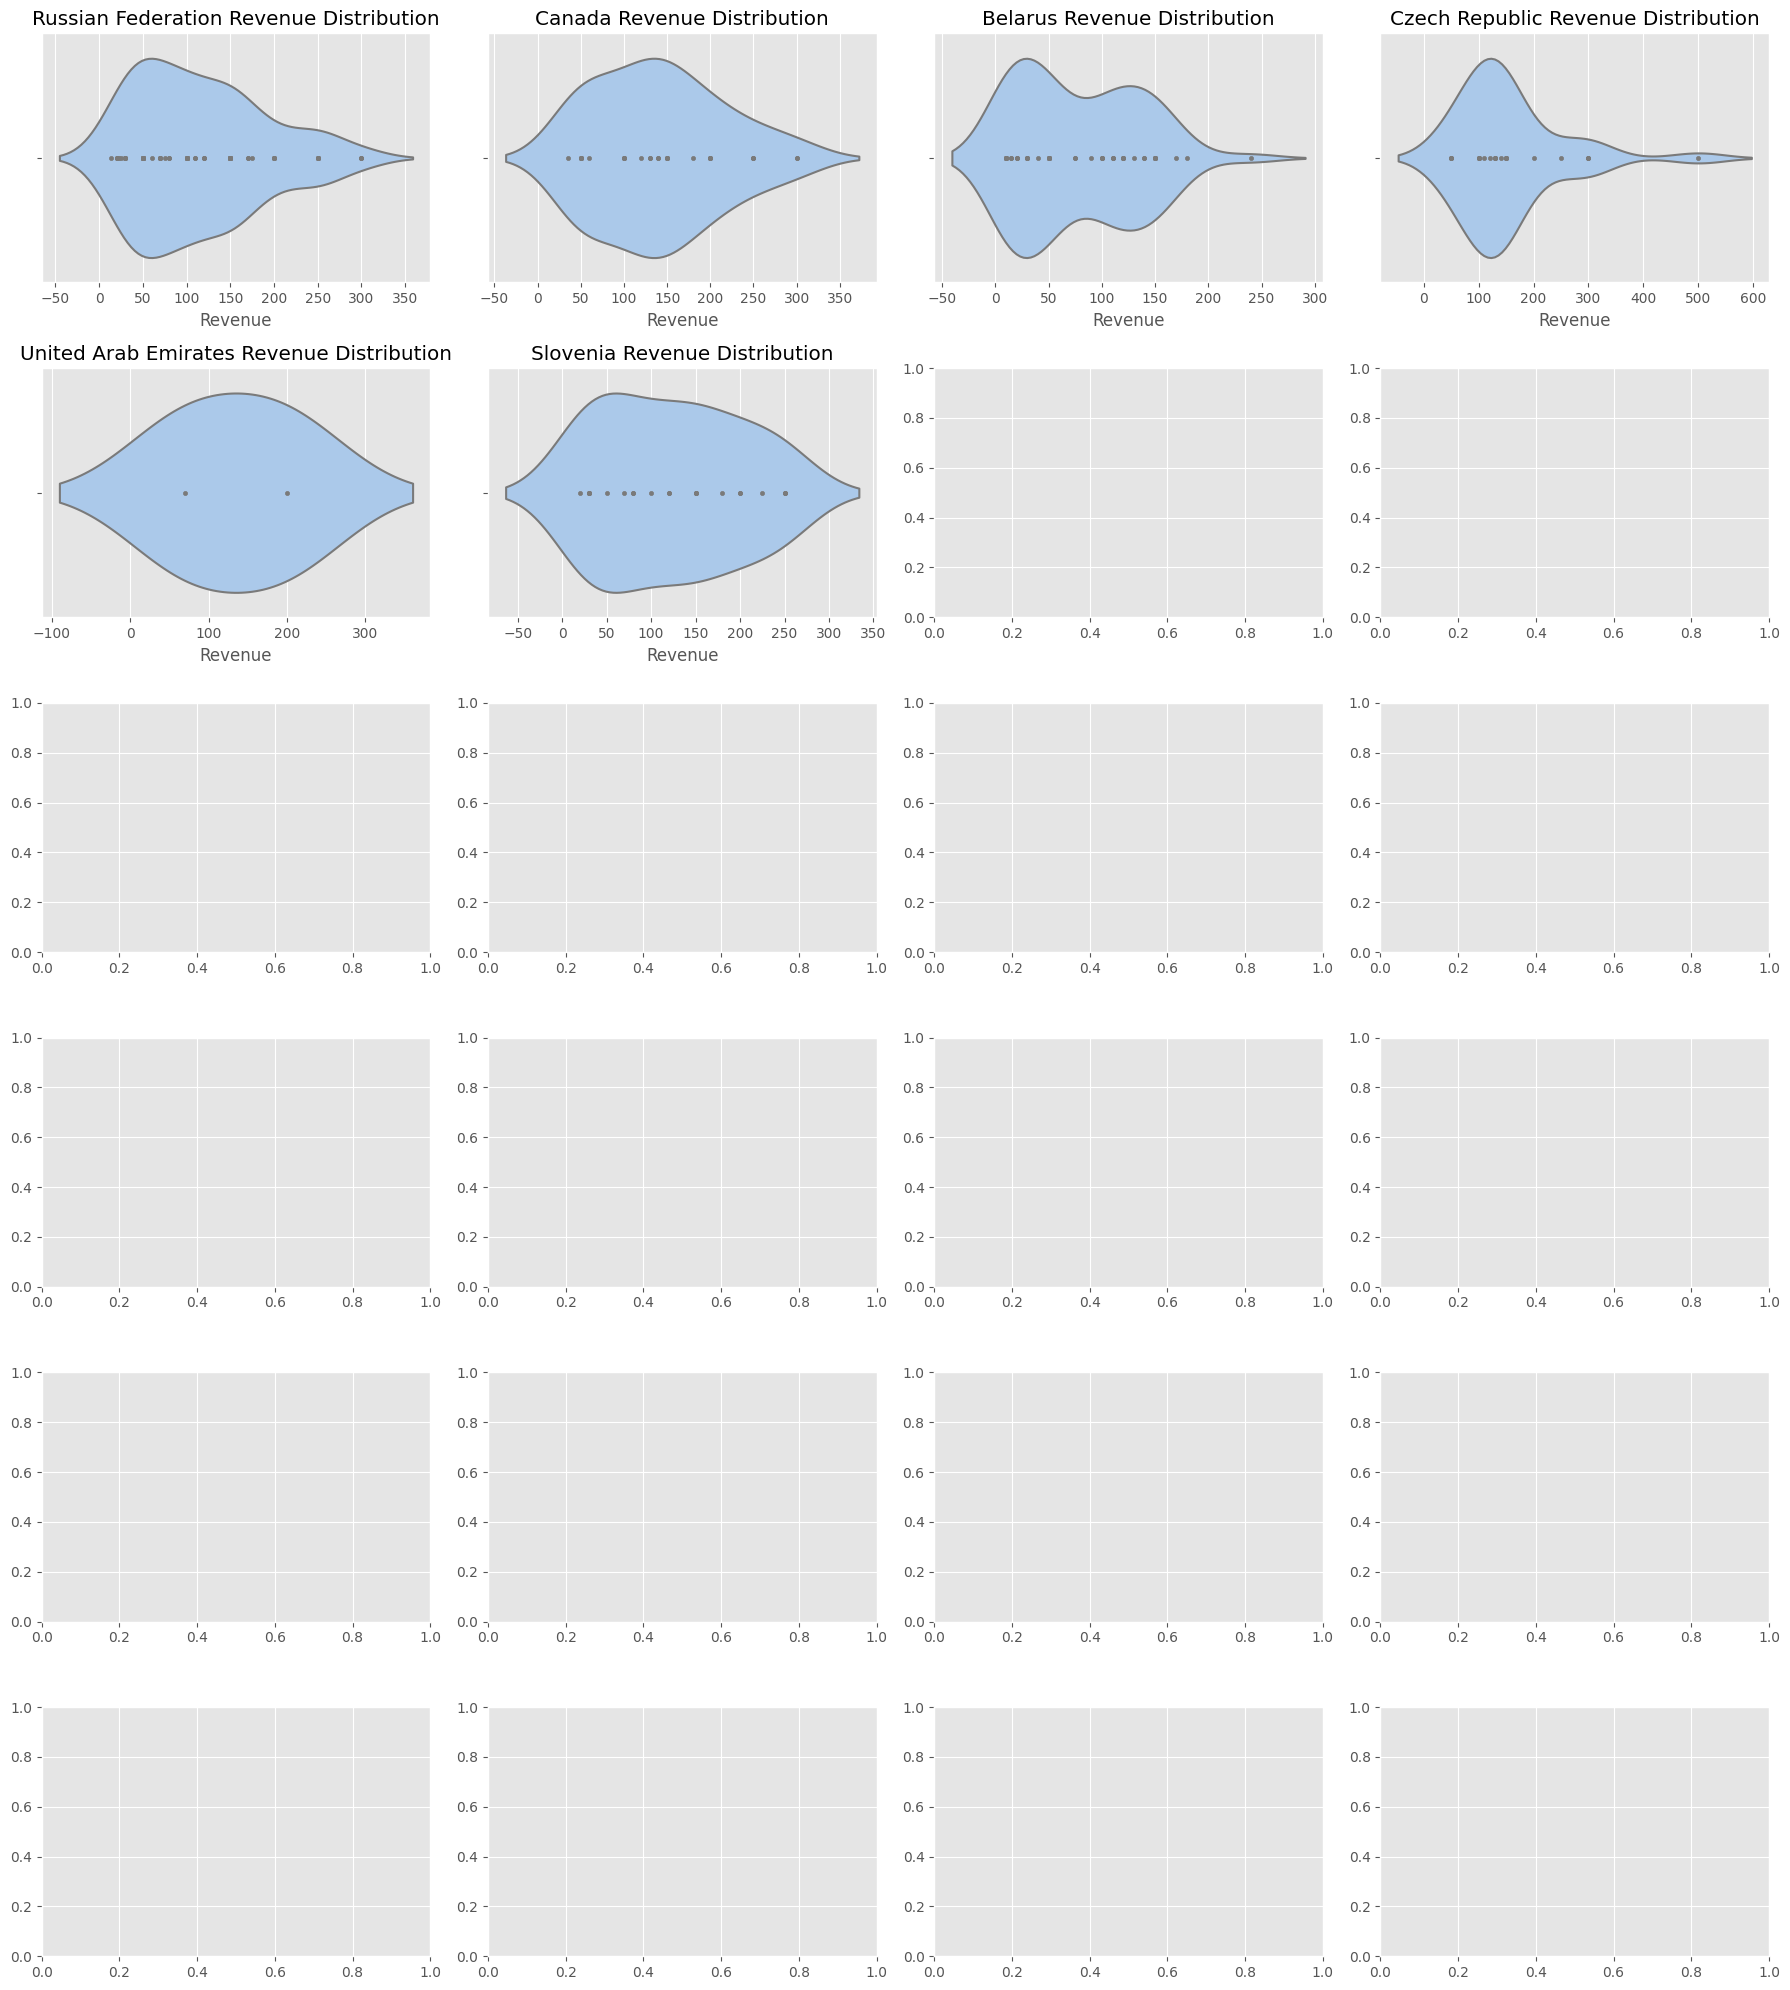

In [15]:
fig, ax = plt.subplots(6, 4, figsize=(18,20))
axes_ = [axes_row for axes in ax for axes_row in axes]

for i, c in enumerate(countries):
    sns.violinplot(x = "Revenue", data = df[df["Country"] == c], ax = axes_[i], inner = "point", palette = "pastel")
    axes_[i].set_title(c + ' ' + "Revenue Distribution")
    plt.tight_layout()

In [17]:
#Из приведенного выше графика видно, что данные не перекошены, и в данных нет высоких экстремальных значений.

In [18]:
#Общее количество уникальных пользователей
len(df["User_ID"].unique())

48

In [19]:
temp_user_df = df.groupby("User_ID").sum()

In [20]:
temp_user_df.reset_index(inplace = True)

In [21]:
temp_user_df.sort_values(by = "Revenue", ascending = False).head(15).iloc[:, :2].style.background_gradient(cmap = "Blues")

<AxesSubplot: xlabel='Platform'>

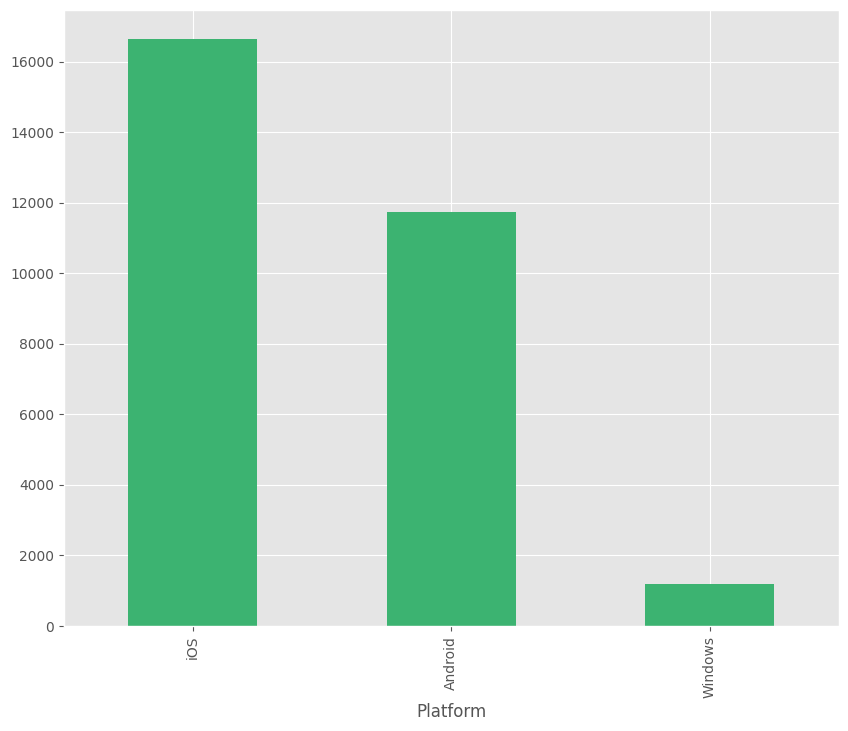

In [22]:
#Давайте проверим, на какой платформе делали платежи чаще
plt.figure(figsize=(10,8))
df.groupby("Platform").sum().sort_values(by = "Revenue", ascending = False).head(15)["Revenue"].plot(kind = "bar", color = 'mediumseagreen')

In [23]:
t_data = df.copy()

In [24]:
t_data.head(5)

Date Platform  User_ID   Reg_Date  Revenue  Payments  Sessions  \
0 2022-09-01      iOS  1511058 2022-08-02      150         1         2   
1 2022-09-01      iOS  1511064 2022-08-30      250         3         2   
2 2022-09-01      iOS  1511066 2022-08-15      300         1         1   
3 2022-09-01  Android  1511059 2022-08-03       90         2         2   
4 2022-09-01  Android  1511070 2022-08-06      200         2         4   

   Playing_Time             Country Payment_Method  
0            15  Russian Federation       bankcard  
1            14  Russian Federation       bankcard  
2            13              Canada       bankcard  
3            16             Belarus       bankcard  
4            15      Czech Republic       bankcard

In [25]:
#анализ даты и времени
t_data.loc[:, "Month"] = df.Date.dt.month
t_data.loc[:, "Time"] = df.Date.dt.time
t_data.loc[:, "Year"] = df.Date.dt.year
t_data.loc[:, "Day"] = df.Date.dt.day
t_data.loc[:, "Quarter"] = df.Date.dt.quarter
t_data.loc[:, "Day of Week"] = df.Date.dt.dayofweek

In [26]:
t_data['Transactions']=t_data.groupby('User_ID')['User_ID'].transform('count')
t_data.head(10)

Date Platform  User_ID   Reg_Date  Revenue  Payments  Sessions  \
0 2022-09-01      iOS  1511058 2022-08-02      150         1         2   
1 2022-09-01      iOS  1511064 2022-08-30      250         3         2   
2 2022-09-01      iOS  1511066 2022-08-15      300         1         1   
3 2022-09-01  Android  1511059 2022-08-03       90         2         2   
4 2022-09-01  Android  1511070 2022-08-06      200         2         4   
5 2022-09-01  Android  1511063 2022-09-01      200         2         3   
6 2022-09-01      iOS  1511068 2022-08-03      200         1         1   
7 2022-09-01  Android  1511062 2022-09-01      150         1         2   
8 2022-09-01  Windows  1511060 2022-08-06      100         0         4   
9 2022-09-01  Android  1511065 2022-08-25      200         2         3   

   Playing_Time               Country Payment_Method  Month      Time  Year  \
0            15    Russian Federation       bankcard      9  00:00:00  2022   
1            14    Russian Federation       bankcard      9  00:00:00  2022   
2            13                Canada       bankcard      9  00:00:00  2022   
3            16               Belarus       bankcard      9  00:00:00  2022   
4            15        Czech Republic       bankcard      9  00:00:00  2022   
5            22  United Arab Emirates       bankcard      9  00:00:00  2022   
6             5    Russian Federation           visa      9  00:00:00  2022   
7            12                Canada       bankcard      9  00:00:00  2022   
8            10    Russian Federation           visa      9  00:00:00  2022   
9            12              Slovenia           visa      9  00:00:00  2022   

   Day  Quarter  Day of Week  Transactions  
0    1        3            3            15  
1    1        3            3            18  
2    1        3            3             7  
3    1        3            3             3  
4    1        3            3            10  
5    1        3            3             2  
6    1        3            3             9  
7    1        3            3             6  
8    1        3            3             3  
9    1        3            3             8

In [27]:
#Отображение дня недели
dayofweek_mapping = dict({0: "Monday", 
                         1: "Tuesday", 
                         2: "Wednesday" , 
                         3: "Thursday", 
                         4: "Friday", 
                         5: "Saturday", 
                         6: "Sunday"})

In [28]:
t_data["Day of Week"] = t_data["Day of Week"].map(dayofweek_mapping) 

In [29]:
t_data.head(10)

Date Platform  User_ID   Reg_Date  Revenue  Payments  Sessions  \
0 2022-09-01      iOS  1511058 2022-08-02      150         1         2   
1 2022-09-01      iOS  1511064 2022-08-30      250         3         2   
2 2022-09-01      iOS  1511066 2022-08-15      300         1         1   
3 2022-09-01  Android  1511059 2022-08-03       90         2         2   
4 2022-09-01  Android  1511070 2022-08-06      200         2         4   
5 2022-09-01  Android  1511063 2022-09-01      200         2         3   
6 2022-09-01      iOS  1511068 2022-08-03      200         1         1   
7 2022-09-01  Android  1511062 2022-09-01      150         1         2   
8 2022-09-01  Windows  1511060 2022-08-06      100         0         4   
9 2022-09-01  Android  1511065 2022-08-25      200         2         3   

   Playing_Time               Country Payment_Method  Month      Time  Year  \
0            15    Russian Federation       bankcard      9  00:00:00  2022   
1            14    Russian Federation       bankcard      9  00:00:00  2022   
2            13                Canada       bankcard      9  00:00:00  2022   
3            16               Belarus       bankcard      9  00:00:00  2022   
4            15        Czech Republic       bankcard      9  00:00:00  2022   
5            22  United Arab Emirates       bankcard      9  00:00:00  2022   
6             5    Russian Federation           visa      9  00:00:00  2022   
7            12                Canada       bankcard      9  00:00:00  2022   
8            10    Russian Federation           visa      9  00:00:00  2022   
9            12              Slovenia           visa      9  00:00:00  2022   

   Day  Quarter Day of Week  Transactions  
0    1        3    Thursday            15  
1    1        3    Thursday            18  
2    1        3    Thursday             7  
3    1        3    Thursday             3  
4    1        3    Thursday            10  
5    1        3    Thursday             2  
6    1        3    Thursday             9  
7    1        3    Thursday             6  
8    1        3    Thursday             3  
9    1        3    Thursday             8

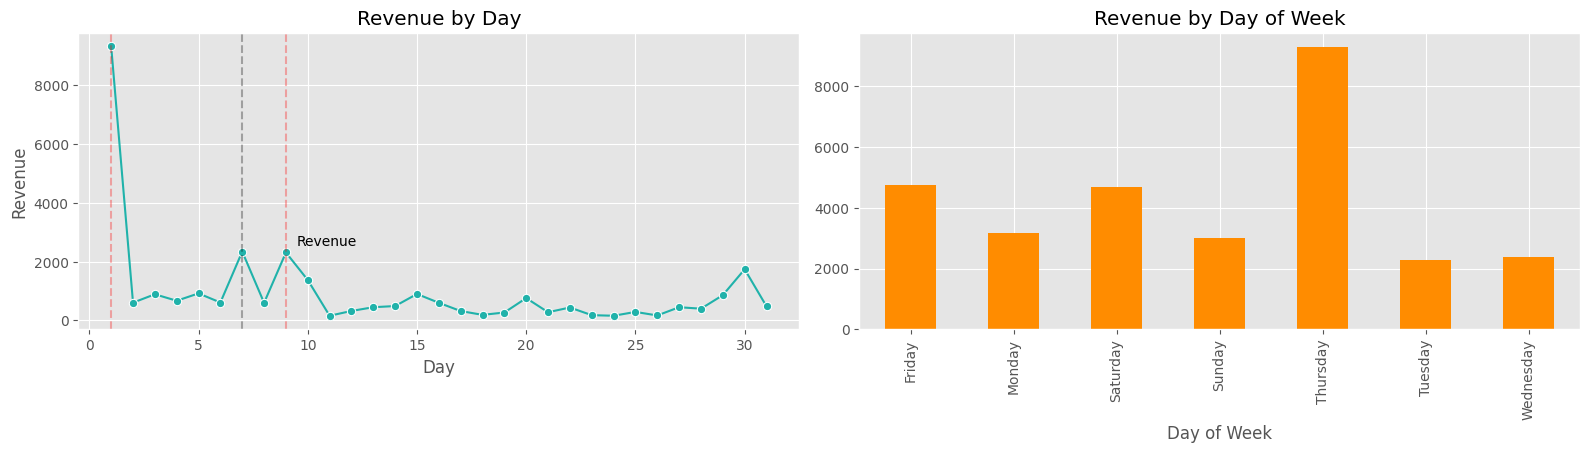

In [30]:
#Давайте посмотрим на доход по дням и по дням недели

plt.figure(figsize=(16,12))
plt.subplot(3,2,2)
t_data.groupby("Day of Week").sum()["Revenue"].plot(kind = "bar", color = "darkorange")
plt.title("Revenue by Day of Week")

plt.subplot(3,2,1)
df_day = t_data.groupby("Day").sum("Revenue")
df_day["Day"] = df_day.index
plt.subplot(3,2,1)
sns.lineplot(x = "Day", y = "Revenue", data = df_day, marker = "o", color = "lightseagreen")
plt.axvline(7, color = "k", linestyle = '--', alpha = 0.3)
plt.text(9.5, 2550, "Revenue")
plt.axvline(9, color = "r", linestyle = '--', alpha = 0.3)
plt.axvline(1, color = "r", linestyle = '--', alpha = 0.3)
plt.title("Revenue by Day")



plt.tight_layout()
plt.show()

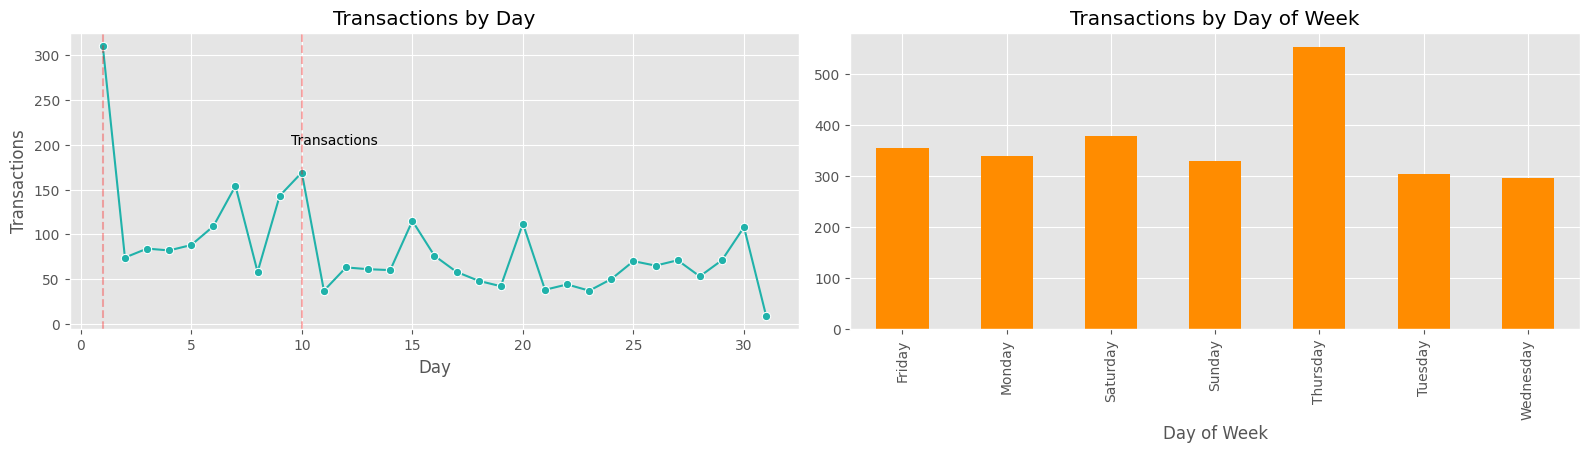

In [31]:
#Давайте посмотрим транзакции по дням и по дням недели

plt.figure(figsize=(16,12))
plt.subplot(3,2,2)
t_data.groupby("Day of Week").sum()["Transactions"].plot(kind = "bar", color = "darkorange")
plt.title("Transactions by Day of Week")

plt.subplot(3,2,1)
df_day = t_data.groupby("Day").sum("Transactions")
df_day["Day"] = df_day.index

sns.lineplot(x = "Day", y = "Transactions", data = df_day, marker = "o", color = "lightseagreen")
plt.axvline(1, color = "r", linestyle = '--', alpha = 0.3)
plt.text(9.5, 200, "Transactions")
plt.axvline(10, color = "r", linestyle = '--', alpha = 0.3)
plt.title("Transactions by Day")



plt.tight_layout()
plt.show()

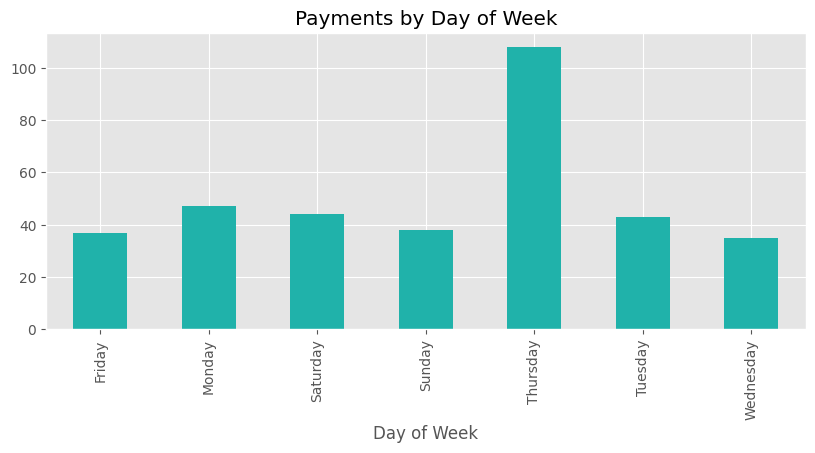

In [32]:
plt.figure(figsize=(16,12))
plt.subplot(3,2,2)
t_data.groupby("Day of Week").sum()["Payments"].plot(kind = "bar", color = "lightseagreen")
plt.title("Payments by Day of Week")

plt.tight_layout()
plt.show()

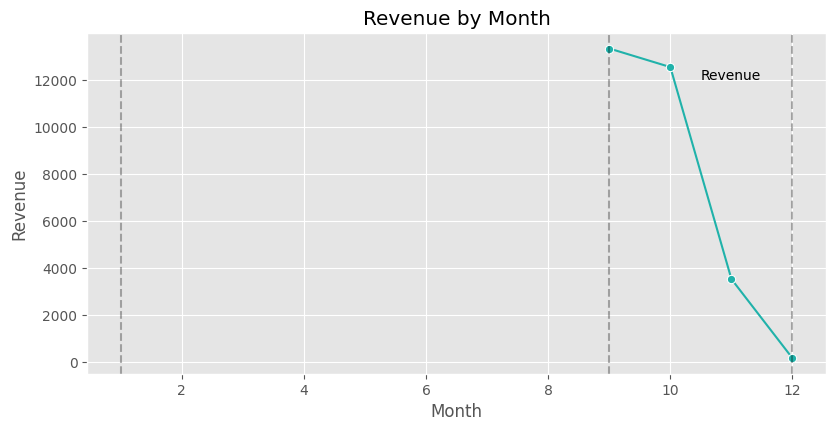

In [33]:
#Доход по месяцам

df_month = t_data.groupby("Month").sum("Revenue")
df_month["Month"] = df_month.index
plt.figure(figsize=(16,12))
plt.subplot(3,2,1)
sns.lineplot(x = "Month", y = "Revenue", data = df_month, marker = "o", color = "lightseagreen")
plt.axvline(1, color = "k", linestyle = '--', alpha = 0.3)
plt.axvline(12, color = "k", linestyle = '--', alpha = 0.3)
plt.axvline(9, color = "k", linestyle = '--', alpha = 0.3)
plt.text(10.5, 12000, "Revenue")
plt.title("Revenue by Month")

plt.tight_layout()
plt.show()

Мы можем отметить, что наибольший доход приходится на первый день транзакций, а затем между 7-10 днями. Пользователи любят делать платежи в четверг. В течение месяца происходит постепенное снижение выручки.

In [34]:
#Recency, Frequency, Monetary Estimation
#Давность сделки, чем меньше времени прошло с момента последней активности, тем больше вероятность повторной сделки
#Частота,чем больше совершено сделок клиентом, тем выше вероятность повтора
#Деньги, чем больше денег потрачено, тем больше вероятность повтора
df.head()

Date Platform  User_ID   Reg_Date  Revenue  Payments  Sessions  \
0 2022-09-01      iOS  1511058 2022-08-02      150         1         2   
1 2022-09-01      iOS  1511064 2022-08-30      250         3         2   
2 2022-09-01      iOS  1511066 2022-08-15      300         1         1   
3 2022-09-01  Android  1511059 2022-08-03       90         2         2   
4 2022-09-01  Android  1511070 2022-08-06      200         2         4   

   Playing_Time             Country Payment_Method  
0            15  Russian Federation       bankcard  
1            14  Russian Federation       bankcard  
2            13              Canada       bankcard  
3            16             Belarus       bankcard  
4            15      Czech Republic       bankcard

In [35]:
import lifetimes

In [36]:
summary = lifetimes.utils.summary_data_from_transaction_data(df, "User_ID", "Date", "Revenue")

In [37]:
summary.head()

frequency  recency      T  monetary_value
User_ID                                           
1511058       13.0     80.0  100.0       75.230769
1511059        2.0      5.0  100.0       30.000000
1511060        2.0      8.0  100.0      110.000000
1511061        2.0      8.0  100.0      205.000000
1511062        5.0     33.0  100.0       69.000000

In [38]:
summary.reset_index(inplace = True)

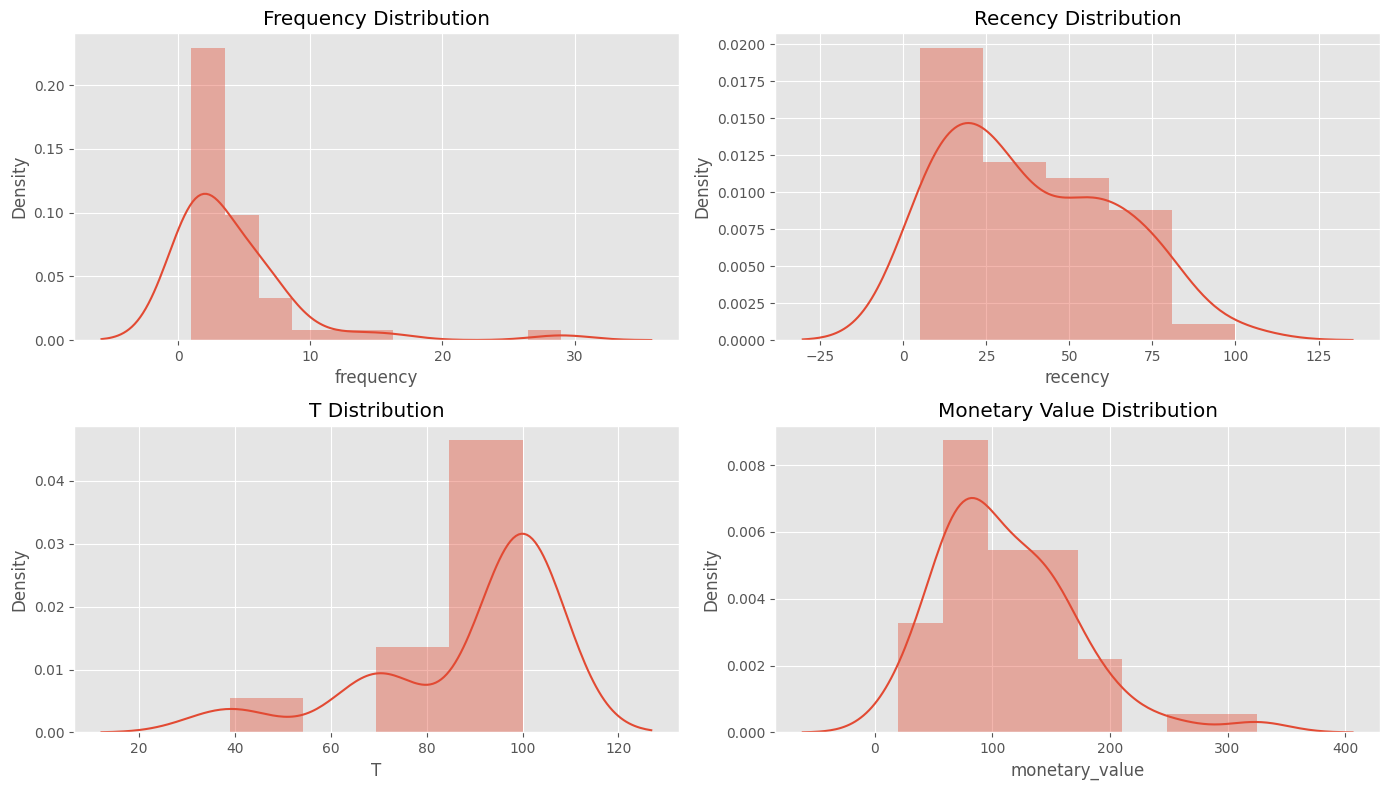

In [39]:
plt.figure(figsize=(14,8))
plt.subplot(221)
sns.distplot(summary["frequency"])
plt.title("Frequency Distribution")
plt.subplot(222)
sns.distplot(summary["recency"])
plt.title("Recency Distribution")
plt.subplot(223)
sns.distplot(summary["T"])
plt.title("T Distribution")
plt.subplot(224)
sns.distplot(summary["monetary_value"])
plt.title("Monetary Value Distribution")
plt.tight_layout()

In [ ]:
"""
можно сделать вывод, что
Частота, Давность и Деньги распределены в соответствии с нормальным распределением.
Большинство значений сконцентрированы к центру, чем дальше от центра, тем реже встречаются показатели. 
"""

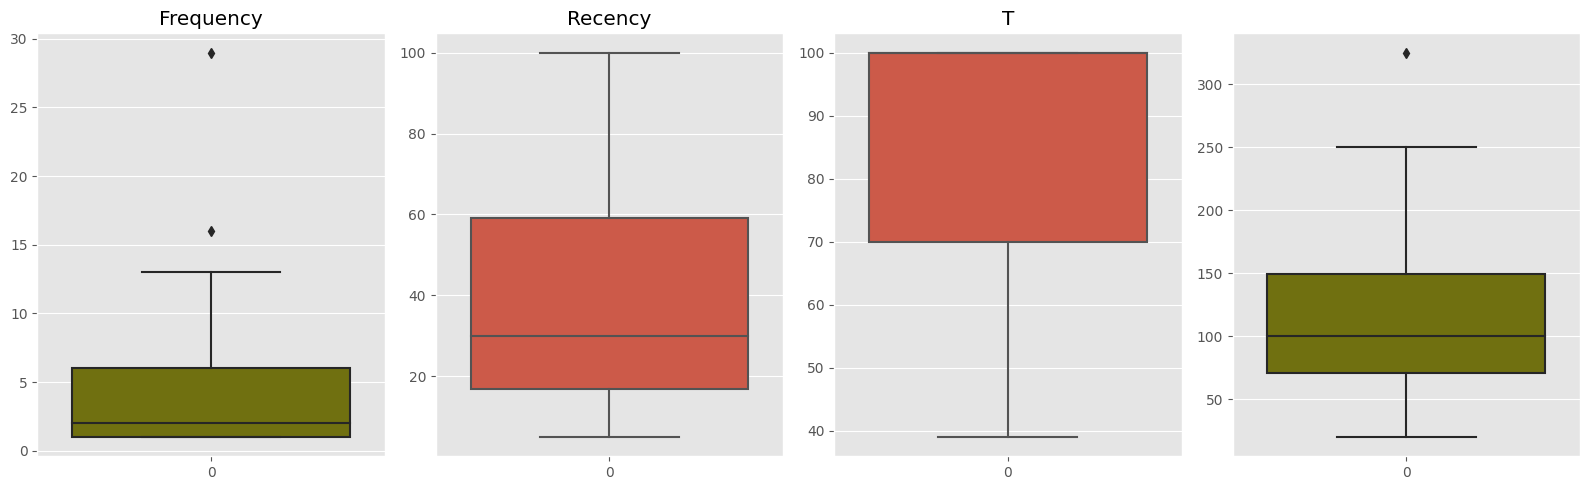

In [40]:
plt.figure(figsize=(16,5))
plt.subplot(141)
sns.boxplot(summary["frequency"], color = "olive")
plt.title("Frequency")
plt.subplot(142)
sns.boxplot(summary["recency"])
plt.title("Recency")
plt.subplot(143)
sns.boxplot(summary["T"])
plt.title("T")
plt.subplot(144)
sns.boxplot(summary["monetary_value"], color = "olive")

plt.tight_layout()

In [41]:
summary.describe(percentiles = [0.01,0.1,0.25,0.50,0.75,0.90,0.99])

User_ID  frequency     recency           T  monetary_value
count  4.800000e+01  48.000000   48.000000   48.000000       48.000000
mean   3.210956e+06   4.166667   37.916667   88.666667      112.474243
std    4.545048e+06   4.909103   25.461555   19.416305       58.782457
min    1.511058e+06   1.000000    5.000000   39.000000       20.000000
1%     1.511058e+06   1.000000    5.000000   39.000000       24.700000
10%    1.511063e+06   1.000000    7.400000   70.000000       53.982759
25%    1.511070e+06   1.000000   16.750000   70.000000       70.833333
50%    1.511082e+06   2.000000   30.000000  100.000000      100.000000
75%    1.511093e+06   6.000000   59.000000  100.000000      149.531250
90%    1.511010e+07   7.300000   75.300000  100.000000      179.500000
99%    1.511010e+07  22.890000   90.600000  100.000000      289.750000
max    1.511010e+07  29.000000  100.000000  100.000000      325.000000

Мы можем видеть, что money_value и recency меняются без экстремальных значений, но это не так, когда частота меняется с 90 на 99 процентиль.

In [42]:
#Pareto/Negative Binomial Distribution Model

from lifetimes.plotting import plot_frequency_recency_matrix
from lifetimes.plotting import plot_probability_alive_matrix
from lifetimes.plotting import plot_period_transactions
from lifetimes.utils import calibration_and_holdout_data
from lifetimes import ParetoNBDFitter
from lifetimes.plotting import plot_history_alive
from sklearn.metrics import mean_squared_error, r2_score
#from sklearn.preprocessing import MinMaxScaler
import math
from math import sqrt

In [43]:
df.head(5)

Date Platform  User_ID   Reg_Date  Revenue  Payments  Sessions  \
0 2022-09-01      iOS  1511058 2022-08-02      150         1         2   
1 2022-09-01      iOS  1511064 2022-08-30      250         3         2   
2 2022-09-01      iOS  1511066 2022-08-15      300         1         1   
3 2022-09-01  Android  1511059 2022-08-03       90         2         2   
4 2022-09-01  Android  1511070 2022-08-06      200         2         4   

   Playing_Time             Country Payment_Method  
0            15  Russian Federation       bankcard  
1            14  Russian Federation       bankcard  
2            13              Canada       bankcard  
3            16             Belarus       bankcard  
4            15      Czech Republic       bankcard

In [44]:
def get_model(df, penalizer_val, time):
    
    pareto_result = df.copy()

    pareto_model = ParetoNBDFitter(penalizer_coef = penalizer_val)
    pareto_model.fit(pareto_result["frequency"], pareto_result["recency"], pareto_result["T"])

    #расчет предсказанных_покупок

    t = time

    pareto_result["predicted_purchases"] = pareto_model.conditional_expected_number_of_purchases_up_to_time(
        t, pareto_result["frequency"], pareto_result["recency"], pareto_result["T"])


    pareto_result["Actual_Purchases"] = pareto_result["frequency"] / pareto_result["recency"] * time

    #заполнение нулевых значений
    pareto_result["Actual_Purchases"].fillna(0, inplace = True)


    #вычисление ошибки
    pareto_result["Prediction_Error"] = abs(pareto_result["Actual_Purchases"] - pareto_result["predicted_purchases"])

    
    #вычисление ошибки предсказания покупки
    #scaler = MinMaxScaler()
    
    
    pareto_mse_purchase = mean_squared_error(pareto_result["Actual_Purchases"], pareto_result["predicted_purchases"])
    pareto_r2_purchase = r2_score(pareto_result["Actual_Purchases"], pareto_result["predicted_purchases"])
    pareto_rmse_purchase = sqrt(mean_squared_error(pareto_result["Actual_Purchases"], pareto_result["predicted_purchases"]))
    pareto_avg_error_purchase = pareto_result["Prediction_Error"].mean()
    
    
    
    
    print("Predicted Purchase Mean Squared Error: %s" %(pareto_mse_purchase))
    print("Predicted Purchase R2 Score: %s" %(pareto_r2_purchase))
    print("Predicted Purchase Root Mean Squared Error: %s" %(pareto_rmse_purchase))
    print("Predicted Purchase Average Purchases Error: %s" %(pareto_avg_error_purchase))
    
    
    #построение графика прогноза и фактической покупки
    plt.figure(figsize=(10,5))
    plt.errorbar(pareto_result["Actual_Purchases"], pareto_result["predicted_purchases"], yerr=pareto_result["Prediction_Error"], fmt='o', color='darkseagreen',
                 ecolor='grey', elinewidth=2, capsize=0, alpha = 1);
    plt.title("Prediction v/s Actual")

Predicted Purchase Mean Squared Error: 88.39281425436434
Predicted Purchase R2 Score: -0.4640433628476812
Predicted Purchase Root Mean Squared Error: 9.401745277041085
Predicted Purchase Average Purchases Error: 5.163234387533244


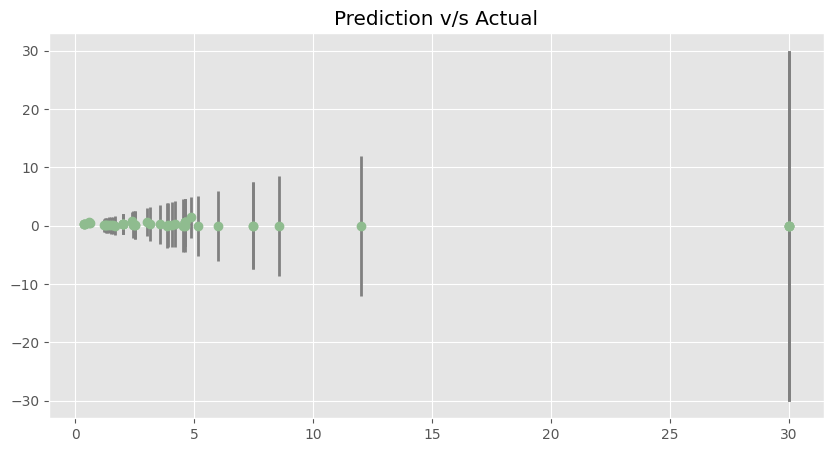

In [45]:
get_model(summary, 0.1, 30)

In [46]:
pareto_model = lifetimes.ParetoNBDFitter(penalizer_coef = 0.1)

In [47]:
pareto_model.fit(summary["frequency"],summary["recency"], summary["T"])

<lifetimes.ParetoNBDFitter: fitted with 48 subjects, alpha: 8.66, beta: 156.67, r: 0.98, s: 2.59>

<AxesSubplot: title={'center': 'Expected Number of Future Purchases for 1 Unit of Time,\nby Frequency and Recency of a Customer'}, xlabel="Customer's Historical Frequency", ylabel="Customer's Recency">

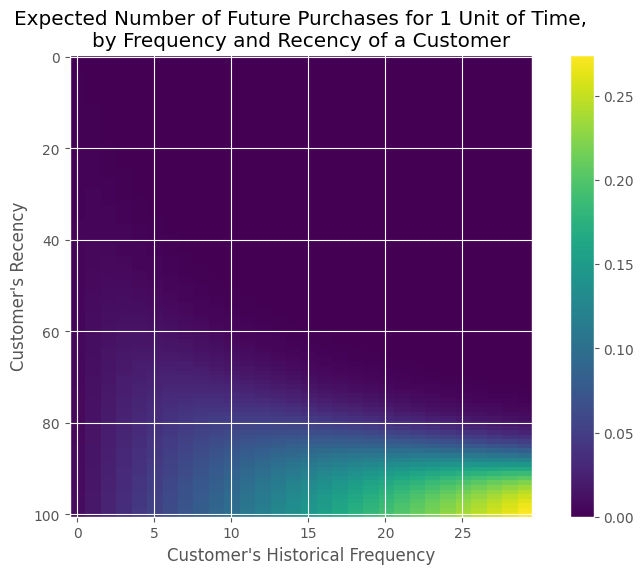

In [48]:
plt.figure(figsize=(10,6))
plot_frequency_recency_matrix(pareto_model)

<AxesSubplot: title={'center': 'Probability Customer is Alive,\nby Frequency and Recency of a Customer'}, xlabel="Customer's Historical Frequency", ylabel="Customer's Recency">

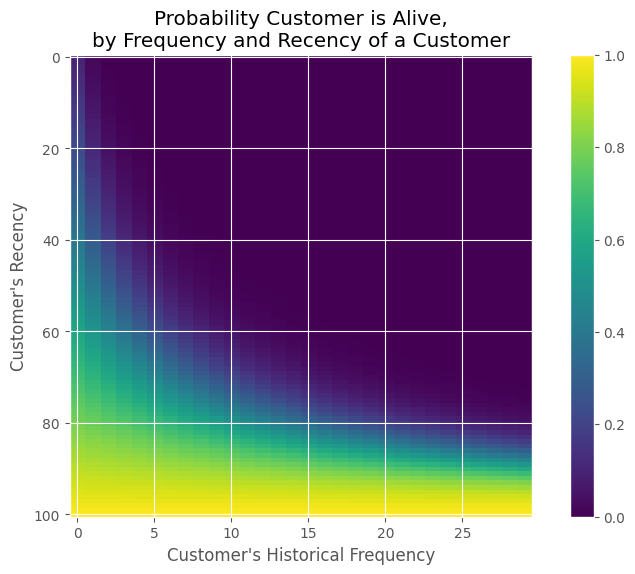

In [49]:
plt.figure(figsize=(10,6))
plot_probability_alive_matrix(pareto_model)

In [50]:
pareto_result = summary.copy()

In [51]:
pareto_result["p_not_alive"] = 1-pareto_model.conditional_probability_alive(pareto_result["frequency"], pareto_result["recency"], pareto_result["T"])
pareto_result["p_alive"] = pareto_model.conditional_probability_alive(pareto_result["frequency"], pareto_result["recency"], pareto_result["T"])

In [52]:
pareto_result.head()

User_ID  frequency  recency      T  monetary_value  p_not_alive   p_alive
0  1511058       13.0     80.0  100.0       75.230769     0.575181  0.424819
1  1511059        2.0      5.0  100.0       30.000000     0.993073  0.006927
2  1511060        2.0      8.0  100.0      110.000000     0.988737  0.011263
3  1511061        2.0      8.0  100.0      205.000000     0.988737  0.011263
4  1511062        5.0     33.0  100.0       69.000000     0.984885  0.015115

In [53]:
t = 30
pareto_result["predicted_purchases"] = pareto_model.conditional_expected_number_of_purchases_up_to_time(t, pareto_result["frequency"], pareto_result["recency"], pareto_result["T"])

In [54]:
pareto_result.head(10)

User_ID  frequency  recency      T  monetary_value  p_not_alive   p_alive  \
0  1511058       13.0     80.0  100.0       75.230769     0.575181  0.424819   
1  1511059        2.0      5.0  100.0       30.000000     0.993073  0.006927   
2  1511060        2.0      8.0  100.0      110.000000     0.988737  0.011263   
3  1511061        2.0      8.0  100.0      205.000000     0.988737  0.011263   
4  1511062        5.0     33.0  100.0       69.000000     0.984885  0.015115   
5  1511063        1.0      5.0  100.0       70.000000     0.966039  0.033961   
6  1511064       16.0     56.0  100.0      102.500000     0.998016  0.001984   
7  1511065        7.0     54.0  100.0       67.142857     0.926600  0.073400   
8  1511066        6.0     39.0  100.0      141.666667     0.982901  0.017099   
9  1511067        5.0     29.0  100.0      138.000000     0.991575  0.008425   

   predicted_purchases  
0             1.421982  
1             0.004941  
2             0.008034  
3             0.008034  
4             0.021639  
5             0.016093  
6             0.008064  
7             0.140235  
8             0.028574  
9             0.012062

<AxesSubplot: title={'center': 'Frequency of Repeat Transactions'}, xlabel='Number of Calibration Period Transactions', ylabel='Customers'>

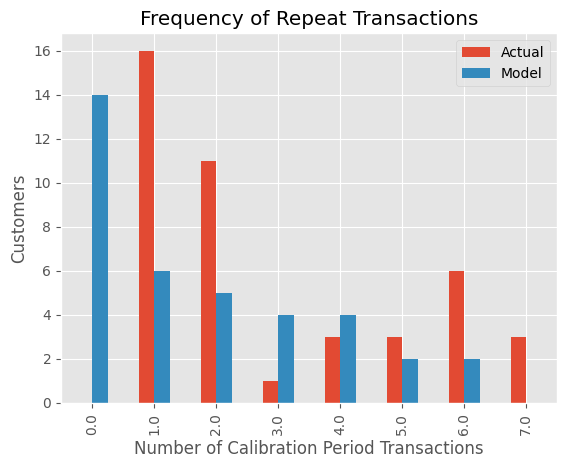

In [55]:
plot_period_transactions(pareto_model)

In [56]:
#разделим датасет на обучение и тестовое 
pareto_summary_cal_holdout = calibration_and_holdout_data(df, "User_ID", "Date", 
                                                   calibration_period_end = '2022-09-30',
                                                  observation_period_end = '2022-10-31')

In [57]:
pareto_summary_cal_holdout.head(20)

frequency_cal  recency_cal  T_cal  frequency_holdout  \
User_ID                                                         
1511058            7.0         28.0   29.0                4.0   
1511059            2.0          5.0   29.0                0.0   
1511060            2.0          8.0   29.0                0.0   
1511061            2.0          8.0   29.0                0.0   
1511062            4.0         14.0   29.0                1.0   
1511063            1.0          5.0   29.0                0.0   
1511064            8.0         28.0   29.0                8.0   
1511065            4.0         17.0   29.0                3.0   
1511066            4.0         29.0   29.0                2.0   
1511067            5.0         29.0   29.0                0.0   
1511068            4.0          9.0   29.0                4.0   
1511069            0.0          0.0   29.0                4.0   
1511070            3.0         29.0   29.0                4.0   
1511071            0.0          0.0   29.0                4.0   
1511072            0.0          0.0   29.0                5.0   
1511073            0.0          0.0   29.0                4.0   
1511074            0.0          0.0   29.0                5.0   
1511075            0.0          0.0   29.0                6.0   
1511076            0.0          0.0   29.0                1.0   
1511077            0.0          0.0   29.0                3.0   

         duration_holdout  
User_ID                    
1511058              31.0  
1511059              31.0  
1511060              31.0  
1511061              31.0  
1511062              31.0  
1511063              31.0  
1511064              31.0  
1511065              31.0  
1511066              31.0  
1511067              31.0  
1511068              31.0  
1511069              31.0  
1511070              31.0  
1511071              31.0  
1511072              31.0  
1511073              31.0  
1511074              31.0  
1511075              31.0  
1511076              31.0  
1511077              31.0

In [58]:
pareto_model.fit(pareto_summary_cal_holdout["frequency_cal"],
               pareto_summary_cal_holdout["recency_cal"],
               pareto_summary_cal_holdout["T_cal"])

<lifetimes.ParetoNBDFitter: fitted with 34 subjects, alpha: 13.56, beta: 15.94, r: 0.86, s: 0.21>

In [59]:
from lifetimes.plotting import plot_calibration_purchases_vs_holdout_purchases

<AxesSubplot: title={'center': 'Actual Purchases in Holdout Period vs Predicted Purchases'}, xlabel='Purchases in calibration period', ylabel='Average of Purchases in Holdout Period'>

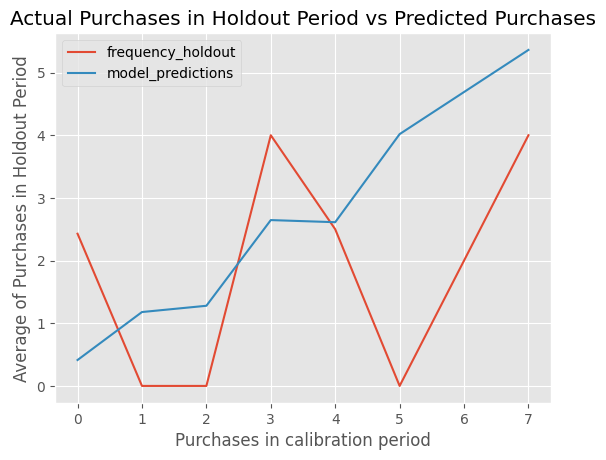

In [60]:
plot_calibration_purchases_vs_holdout_purchases(pareto_model, pareto_summary_cal_holdout)

In [61]:
pareto_summary_cal_holdout.head()

frequency_cal  recency_cal  T_cal  frequency_holdout  \
User_ID                                                         
1511058            7.0         28.0   29.0                4.0   
1511059            2.0          5.0   29.0                0.0   
1511060            2.0          8.0   29.0                0.0   
1511061            2.0          8.0   29.0                0.0   
1511062            4.0         14.0   29.0                1.0   

         duration_holdout  
User_ID                    
1511058              31.0  
1511059              31.0  
1511060              31.0  
1511061              31.0  
1511062              31.0

In [62]:
pareto_result["actual30"] = pareto_result["frequency"]/pareto_result["recency"]*30

In [63]:
pareto_result["actual30"].fillna(0, inplace = True)

In [64]:
pareto_result["error"] = pareto_result["actual30"]-pareto_result["predicted_purchases"]

In [65]:
pareto_result.head()

User_ID  frequency  recency      T  monetary_value  p_not_alive   p_alive  \
0  1511058       13.0     80.0  100.0       75.230769     0.575181  0.424819   
1  1511059        2.0      5.0  100.0       30.000000     0.993073  0.006927   
2  1511060        2.0      8.0  100.0      110.000000     0.988737  0.011263   
3  1511061        2.0      8.0  100.0      205.000000     0.988737  0.011263   
4  1511062        5.0     33.0  100.0       69.000000     0.984885  0.015115   

   predicted_purchases   actual30      error  
0             1.421982   4.875000   3.453018  
1             0.004941  12.000000  11.995059  
2             0.008034   7.500000   7.491966  
3             0.008034   7.500000   7.491966  
4             0.021639   4.545455   4.523815

Mean Squared Error: 88.3928220905596
Root Mean Squared Error: 9.401745693782598
R2 Score: -0.46404349263797884


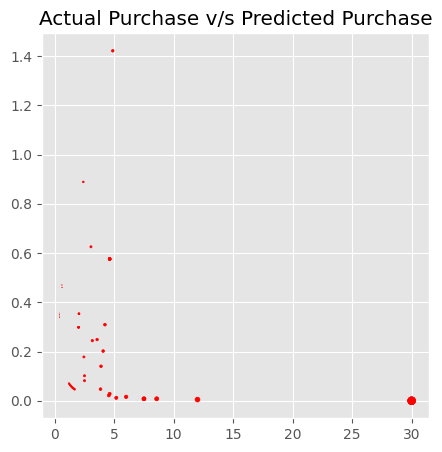

In [66]:
def get_metrics(true, predicted, error): 
   
    pareto_result["actual30"] = pareto_result["frequency"]/pareto_result["recency"]*30
    pareto_result["actual30"].fillna(0, inplace = True)
    pareto_result["error"] = pareto_result["actual30"]-pareto_result["predicted_purchases"]
    
    
    print("Mean Squared Error: %s"%(mean_squared_error(true, predicted)))
    print("Root Mean Squared Error: %s"%(sqrt(mean_squared_error(true, predicted))))
    print("R2 Score: %s"%(r2_score(true, predicted)))
    
    #N=48
    colors = "red"
    
    #z = [10,20,30,50,100]
    #plt.figure(figsize=(10,10))
    plt.scatter(pareto_result["actual30"], pareto_result["predicted_purchases"], pareto_result["error"], marker='o', c=colors, alpha=1)
    plt.title("Actual Purchase v/s Predicted Purchase")
    plt.gcf().set_size_inches((5, 5))  
    plt.show()
    

get_metrics(pareto_result["actual30"], pareto_result["predicted_purchases"], pareto_result["error"])

In [ ]:
"""
Mean Squared Error: 88.39 - 
среднеквадратическая ошибка 
показывает реальное среднее отклонение от среднего по выборке

Root Mean Squared Error: 9.40 - корень квадратный из среднеквадратической ошибки, 
показывает разность между предсказанными и наблюдаемыми данными в модели


R2 Score: -0.46 - коэффициент детерминации, показывает насколько условная дисперсия
модели отличается от дисперсии реальных значений
    
"""

In [67]:
from lifetimes.plotting import plot_history_alive
import matplotlib.pyplot as plt

<AxesSubplot: title={'center': 'History of P_alive'}, ylabel='P_alive'>

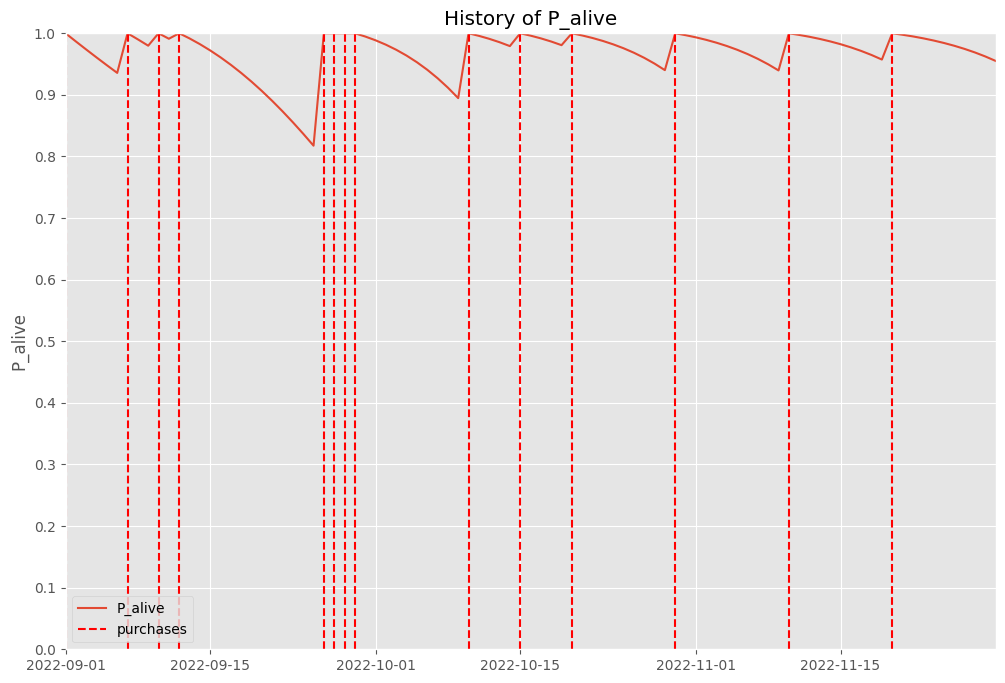

In [68]:
fig = plt.figure(figsize=(12,8))
id = 1511058
t = 90
sp_trans = df.loc[df["User_ID"] == id]
plot_history_alive(pareto_model, t, sp_trans, 'Date')